# day 164, day 166

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
import requests
from io import BytesIO
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from google.colab import drive

# Take 10 photos of two different things and build your own CNN image classifier using the techniques we've built here.

1. take 10 images of pet bottle
2. take 10 images of cardboard boxes
3. upload the directory.


# getting the images from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


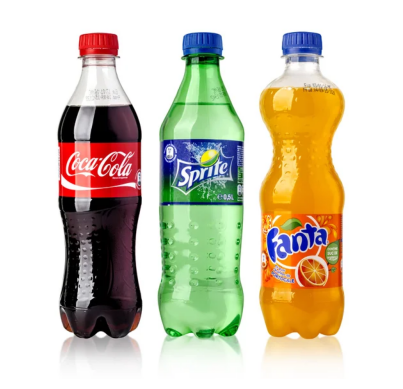

In [ ]:
train_dir = '/content/drive/MyDrive/scrap/train/pet'

random_image = np.random.choice(os.listdir(train_dir))
image_to_numbers = image.imread(train_dir + '/' + random_image)

plt.imshow(image_to_numbers)

plt.axis('off')
plt.show()


# preprocessing the data

In [ ]:
train_dir = '/content/drive/MyDrive/scrap/train'
test_dir = '/content/drive/MyDrive/scrap/test'


# data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen= ImageDataGenerator(rescale=1./255)

# train and test data preparation
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=10,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=10,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)



Found 42 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


# building a convolutional neural network:


In [ ]:
# build the model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='valid',
                                 input_shape=(224,224,3),
                                 activation='relu',
                                 name='input_layer'))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1,activation='sigmoid',name='output_layer'))

# compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# fit the model

# try to find the ideal learning rate.
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 10**(-4) * 10**(epoch/20))
history = model.fit(train_data,
                    epochs=50,
                    steps_per_epoch=len(train_data),
                    callbacks=[lr_scheduler],
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/50
2/2 [==============================] - 23s 4s/step - loss: 0.6887 - accuracy: 0.5476 - val_loss: 0.6973 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/50
2/2 [==============================] - 1s 1s/step - loss: 0.6844 - accuracy: 0.5000 - val_loss: 0.6950 - val_accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/50
2/2 [==============================] - 1s 322ms/step - loss: 0.6745 - accuracy: 0.5000 - val_loss: 0.6784 - val_accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/50
2/2 [==============================] - 1s 230ms/step - loss: 0.6635 - accuracy: 0.5000 - val_loss: 0.6674 - val_accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/50
2/2 [==============================] - 2s 621ms/step - loss: 0.6483 - accuracy: 0.6190 - val_loss: 0.6553 - val_accuracy: 0.8750 - lr: 1.5849e-04
Epoch 6/50
2/2 [==============================] - 2s 386ms/step - loss: 0.6425 - accuracy: 0.9286 - val_loss: 0.6355 - val_accuracy: 0.8750 - lr: 1.7783e-04
Epoch 7/50
2/2 [==============================] - 1s 965ms/step

# finding the ideal learning rate

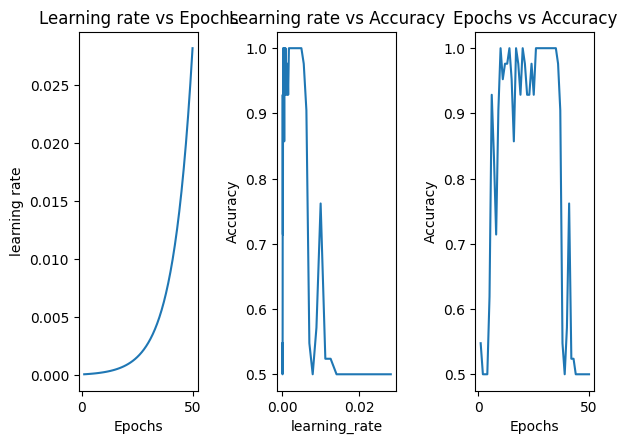

In [ ]:
accuracy = history.history['accuracy']
learning_rate= history.history['lr']

epochs = np.arange(1,len(accuracy)+1)

# plotting
fig,ax = plt.subplots(1,3)
ax[0].plot(epochs,learning_rate)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('learning rate')
ax[0].set_title('Learning rate vs Epochs')

ax[1].plot(learning_rate,accuracy)
ax[1].set_xlabel('learning_rate')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Learning rate vs Accuracy')

ax[2].plot(epochs,accuracy)
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Accuracy')
ax[2].set_title('Epochs vs Accuracy')



plt.tight_layout(pad=2)
plt.show()


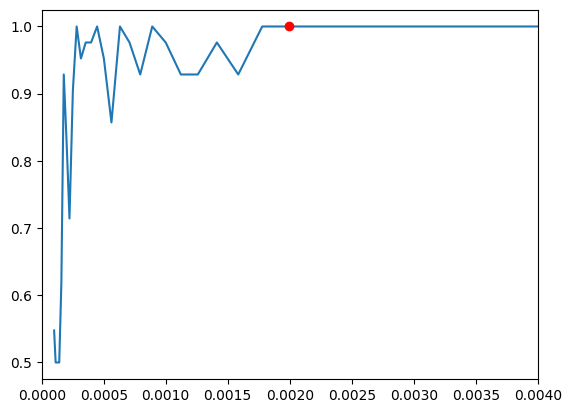

In [ ]:
plt.plot(learning_rate,accuracy)

plt.xlim([0.0,0.004])

# corresponding point
target = 0.002
index = np.argmin(np.abs(target-np.array(learning_rate)))

plt.plot(learning_rate[index],accuracy[index],'ro')
plt.show()

In [ ]:
index

26

# conclusion:
both 0.001 and 0.002 seems to be ideal to me.

# building the model again with 12 epochs and 0.002 learning rate


In [ ]:
# build the model
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Conv2D(filters=32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='valid',
                                 input_shape=(224,224,3),
                                 activation='relu',
                                 name='input_layer'))
model1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),padding='valid'))
model1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),padding='valid'))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(1,activation='sigmoid',name='output_layer'))

# compile the model1
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
               metrics=['accuracy'])


# fit the model1
history1 = model1.fit(train_data,
                      epochs=15,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/15
5/5 [==============================] - 5s 321ms/step - loss: 1.3984 - accuracy: 0.4524 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 2/15
5/5 [==============================] - 1s 237ms/step - loss: 0.6435 - accuracy: 0.6429 - val_loss: 0.9363 - val_accuracy: 0.5000
Epoch 3/15
5/5 [==============================] - 1s 280ms/step - loss: 0.6064 - accuracy: 0.6667 - val_loss: 0.5362 - val_accuracy: 0.7500
Epoch 4/15
5/5 [==============================] - 1s 277ms/step - loss: 0.5204 - accuracy: 0.7619 - val_loss: 0.4558 - val_accuracy: 0.6250
Epoch 5/15
5/5 [==============================] - 1s 231ms/step - loss: 0.3667 - accuracy: 0.8571 - val_loss: 0.2665 - val_accuracy: 0.8750
Epoch 6/15
5/5 [==============================] - 1s 231ms/step - loss: 0.3181 - accuracy: 0.8571 - val_loss: 0.3179 - val_accuracy: 0.8750
Epoch 7/15
5/5 [==============================] - 2s 458ms/step - loss: 0.2574 - accuracy: 0.8810 - val_loss: 0.3703 - val_accuracy: 0.8750
Epoch 8/15
5/5 [====

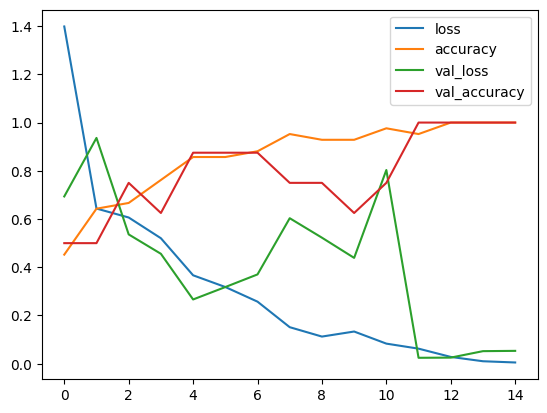

In [ ]:
pd.DataFrame(history1.history).plot()

plt.show()

# take an image from the internet and use your model to predict on its type

1/1 [==============================] - 0s 30ms/step


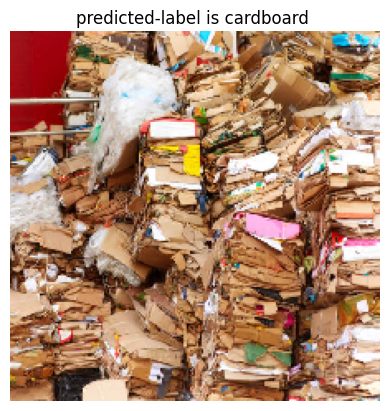

In [ ]:
def load_and_preprocess(url):
  image = load_img(BytesIO(requests.get(url).content),target_size=(224,224))

  # converting the image to numbers:
  image_to_numbers = img_to_array(image)

  # rescaling the image
  rescaled = image_to_numbers/255.

  # expanded
  expanded = tf.expand_dims(rescaled,axis=0)

  return expanded


def predict_and_label(url):

  preprocessed_image = load_and_preprocess(url)
  # getting the class_names
  class_names = sorted(os.listdir('/content/drive/MyDrive/scrap/train'))
  # predict on the image

  prediction = model1.predict(preprocessed_image)
  prediction_label = class_names[int(np.round(prediction))]


  # show the image with corresponding label
  plt.imshow(tf.squeeze(preprocessed_image))

  plt.title('predicted-label is %s '%(prediction_label))

  plt.axis('off')

  plt.show()

url = 'https://media.istockphoto.com/id/1256493466/photo/a-large-pile-of-cardboard-boxes-from-the-goods-sold-stored-in-the-back-of-the-supermarket-the.jpg?s=612x612&w=0&k=20&c=NYq4KT-C_a1OK62DLdYGFM4ehuQiEt93iP5vzPsD110='
predict_and_label(url)


1/1 [==============================] - 0s 21ms/step


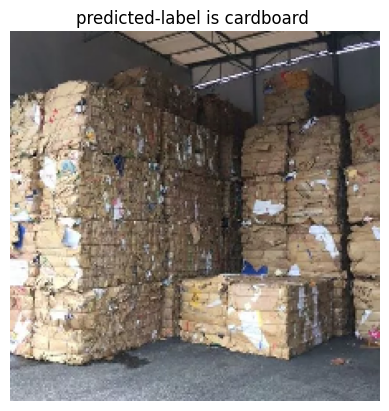

In [ ]:
url = 'https://cdn.b2brazil.com/sites/default/files/styles/large/public/b2brazil/product/image/1_1386.jpg.webp'

predict_and_label(url)

1/1 [==============================] - 0s 24ms/step


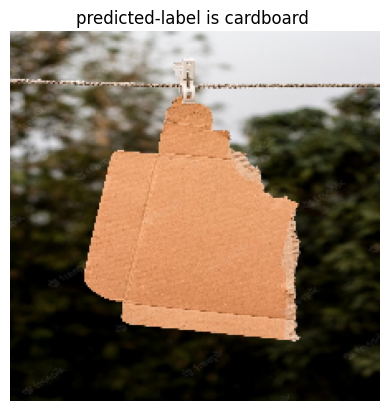

In [ ]:
url = 'https://img.freepik.com/premium-photo/hanging-piece-cardboard-scrap-paper-with-clothesline-dry-sun_150101-5319.jpg?w=2000'
predict_and_label(url)

1/1 [==============================] - 0s 29ms/step


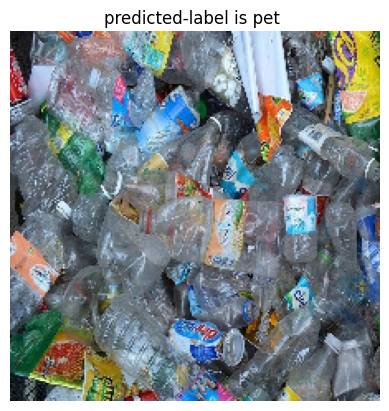

In [ ]:
url = 'https://5.imimg.com/data5/SELLER/Default/2022/2/YV/LU/TH/27335920/45mm-petbottle-scrap.jpg'
predict_and_label(url)

1/1 [==============================] - 0s 18ms/step


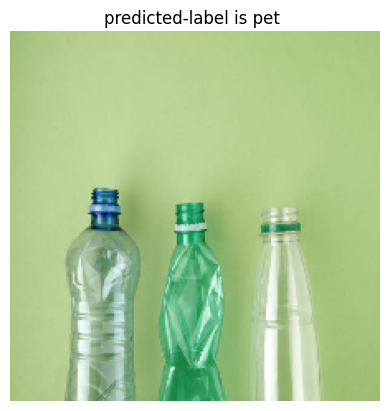

In [ ]:
url = 'https://media.istockphoto.com/id/1307166385/photo/flat-lay-with-plastic-bottles-isolated-on-green.jpg?s=612x612&w=0&k=20&c=0fcs7Z0aAU8b73Pi-e6EuPCR15iC8C_brsqTtIrNjvc='
predict_and_label(url)

# understandings from Mit deep learning course:

# difference between normal neural network(dense) and convolutional neural network(Conv1D,Conv2D,Conv3D etc):

* normal neural nets may simply take more total parameters(that you can see in model.summary()) to capture the breadth and width of an image whereas Convolutional networks take less total parameters making it take less time for computation.


# convolutional layer:

* kernel matrix hovers over the input image with predefined random weights, the weights and the input pixels are multiplied to create that 2D convolution map whose values will be used as weights in the subsequent layers.

* each filter looks to find a different pattern than the other in the image.

*



# flattening the image:
* As we flatten the image, we lose the spatial information of the original image. lets say the original image is a 2D array of numbers as we flatten we convert that 2D into 1D array of numbers. this way we lost the all spatial information of the image.

# kernel:
* kernel_size is determined. kernel hovers over the input_image. kernel has some random weights initially initialized. kernel dot products its weight with input pixels. it creates the feature map which is simply the result of 1 filter.lets say you had 32 filters then the same procedure happens for 32 filters creating 32 individual feature maps. these 32 feature maps are then summed-up(added) element-wise creating one feature map. bias is then added element-wise to all the elements in that final feature map before passing it over to relu.

# relu:

* it is a threshold parameter that dismisses all negative values in the kernel matrix(filter).

# Maxpooling:

* it takes the maximum value in each subregion of the kernel matrix(filter). it is used for extracting the most important features of the image discarding the insignificant ones by selecting only those that had the highest representative value in the kernel matrix.

# Meanpooling instead of Maxpooling:

* Meanpooling is said to preserve more information about the image than the go-to Maxpooling it is because it takes the average of all the values in subregions of kernel matrix and that is beleived to weigh properly the real features of the image.

# Mini-Batch Gradient Descent:

* using loops inside loop takes O(n^2) but vectorization such as np.random.randint(1,2,(3,3,3)) or np.arange(1,100) or torch.randint(1,9,(3,3,3)) takes only O(n) time complexity. even so if the n is too large say 1 billion it may take a computer forever to calculate, optimize,classify and predict that's we segmentize the big data into easy-to-eat bites like 32 images per batch or 32 numbers per batch,32 is default and it is very much controllable but you get the idea, this helps in reducing the total time it would take for a computer to finish a calculation.

* but segmenting the data this way sweeps in variations in each iteration. let's the loss reduces with each epoch but it doesn't compleately and surely reduce, it reduces in the fashion of little bit and little bit this up-down movement is variation due to sample size(batch-size) being small. so the thing to keep in mind is mini-batches(samples) increases the computation speed, decreases the time-complexity but brings along variations with it.

* the right batch size depends on the problem but the default 32 works better for most problems. if the batch-size is 1 then there will be lot of variations(deviations from the optimal point) in the optimising algorithm (Adam or SGD) in getting closer to the optimal point (lowest cost or highest profit points). if the batch size is equal to total number of samples then the computation speed would be lower, time complexity is high but but there will be very less or low noise or variations in the optimiser's trajectory to get to the optimal point. so, it is good to strike a balance between computational speed and lowering variations in the trajectory.

* according to Andrew Ng from deep learning AI if the training-data has less than 2000 inputs then don't batch it. put all 2000 inputs in one go. and
if the training data has more than 2000 inputs then use batch sizes between 8,16,32,64,128,256,512,1024.






# day 169 and day 170,day 173

# learnings:

# why not use regular neurons but Convolutional neural networks for working with picutures?


* Using regular neurons to detect images simply take more parameters to recognize each pixels. That means slower computation, and lot of real estate requirments(space), and also increased chance of overfitting because more parameters more neurons. eg recognizing a single image of size 200*200*3 coresponding to height,width and color channels would require 120000 neurons in regular neural network to recognize the picture which is huge, if you would 10's of 1000's of images it would scale up pretty quickly requiring a behomoth amount of computations. convolutional nerual networks is a shortcut of sort, it takes only the important features, such as edges,contours,rim,dominant color pixel and so on,  of the image  to recognizing the whole picture, this reduces,space and time therefore is a preffered mode for image recognition.

# output dimension formula:

# $$ output size = \frac{w -f +2p}{s} + 1 $$

* where, w is the input size (for 224x224 the W would be 224).
* f is kernel matrix size (for 3x3 the F would be 3).
* p is for padding (if padding is valid P would be 1 otherwise 0).
* s is stride length(for stride length of 1x1, S would be 1).

* i prefer to view the formula with these names instead to dispel any lingering confusion thereof.

# $$ output size = \frac{i -k +2p}{s} + 1 $$

* i is for w
* k is for f.

* for an input size of 224x224, and kernel_size of 3x3 and stride of (1x1) and padding valid, the output size would be 224 as well

* for an input size of 7x7, and kernel_size of 3x3 and stride of 1**1 and padding valid, the output size would be 7

* for an input size of 224x224, and kernel_size of 3x3 and stride of 1x1 and padding=0, the output size would be 222

* for an input size of 7x7, and a kernel_size of 3x3 and stride of 1x1 and padding=0, the output size would be 5.

* notice the difference! when there is no padding, the dimension of the output would reduce from that of the input.

* **In general, setting zero padding to be P=(F−1)/2
 when the stride is S=1
 ensures that the input volume and output volume will have the same size spatially**


 * the depth of the output image is determined by the number of filters you choose to put when defining the model. for example if you had chosen 10 filters, the input size = 224x224x3, kernel_size = 3x3, stride length 1x1, and padding is valid then output dimension would be (224,224,10).

 * each convolutional layer yields its own output which would then be used by subsequent layers as weights.


 # calculating the total number of neurons in a convolutional layer.

 # $$ \text{total neurons }= \text{ output_size * kernel_size with color parameter. } $$

 * if the output_size is 224x224x10 where 10 is total number of filters, kernel size is 3x3x3 where the last 3 is depth of the input(color scheme) then the total number of neurons in the first convolutional network is 224x224x10x3x3x3 = 13,547,520 neurons or parameters.

 # how parameters or large number of computationally big and harmful neurons are reduced from 13 million to few thousands.

 * to do that we only have to take the number of filters from the output_part and multiply that with kernel dimension i.e 10*3*3*3 = 270 neurons. see the massive size reduction from 13Million to 270?


 # dilation hyperparameter:

 * dilation is opposite to contiguous. contiguous means gapless, dilation seperated by gaps. if data is contiguous then they are all jammed together in a single cell and if the data is dilated then each data point is seperated from the other by the distance of the dilation.

 * when the dilation is 0, then the cells are contiguous which is not standard in normal convolution problems, if the dilation is 1, then the data is placed in adjacent cells which is the case with normal convolution problems, if the dialtion is greater than 1 then there are gaps between the data points.

 * increasing the dilation might be analogous to having a broader perspective of the image rather than paying attention to each details as increasing dilation causes to skip the pixels, this is how organisms in general view things don't we?( increasing and decreasing dilations as and when required).

 * increasing dilation downsamples the output size.

 # $$ \text{output_dimension with dilation} = \frac{\text{i - k + 2p -(k-1)(d-1)}}{s}$$

 # pooling:

#### max pooling vs average pooling:
* average pooling fell out of favour because max pooling seemed to work better.

#### will getting rid off pooling layer work? what will then be used in its place?

* if we get rid off the pooling layer and choose to go with only conv layers, then we must increase the stride length from (1,1) to (2,2) or higher. this strategy is widely used with models that are built on the architecture of GAN(Generative Adversarial networks) and VAE(Variational Auto Encoders).

* what pooling does is it reduces the size of the representation(in our case of image classification the size of input tensor is the representation of actual image represented in numbers, pooling reduces the dimension of it) taking only the important features, we can achieve the same result with increasing the stride(take big steps and have a broader perspective and deliberately miss a lot of details.)


# difference between normal neural networks and Convolutional neural network:

* normal neural network which is also known as Fully-Connected layer(FC) connects to all activations in the previous layer whereas Conv layers focus on local subregions and extraction of few information and leaving the not so useful information aside while predicting the output. but i think a fully connected conv layer with stride = 1 and with no pooling layer would be no different to a normal neural network. Any fully connected network can be converted to a Conv layer but not always vice versa.

# Layers:

* input layer size should be divisible by 2 such as 32,64,224,512,1080 etc.

* conv layer should use small kernel_size such as 3*3 or 5*5(at most). if you must use bigger kernel like 7*7 use it only on the first conv layer where input is defined the subsequent conv layers must have either 3*3 or 5*5.

* good stride length is 1.

* usually padding should be kept "valid"

* pooling layer such as MaxPool is used for downsampling(reducing the spatial dimension of the input). most commonly we would have a pool layer of size 2x2. 3x3 is also used it is less common. Anything more than 3 is not advisible as it may lead to worse performance.



# mathematics behind deep neural networks

Convolution Operation with Multiple Filters: In a convolutional layer, you typically have multiple filters (also known as kernels). Each filter is responsible for capturing different features or patterns from the input.

Convolution with Each Filter: Each filter is convolved with the input separately. This means that you apply the filter's weights to the input, compute the dot product at each position, and generate a feature map (also called an activation map) for that specific filter.

Summing the Output of Filters: After convolution with all the filters is complete, the individual feature maps produced by each filter are summed together element-wise. This summation combines the information captured by each filter and results in a single feature map, which represents the combined information from all the filters.

Adding Bias: A bias term is added to each element in the combined feature map. The same bias value is added to all positions in the feature map. This bias helps introduce an additional level of flexibility and adaptation to the model.

Activation Function: After adding the bias, the entire feature map is passed through an activation function, such as the Rectified Linear Unit (ReLU). This introduces non-linearity to the network by replacing negative values with zero.

Final Output: The resulting feature map, after activation, serves as the output of the convolutional layer. This feature map can then be used as input to subsequent layers in the neural network.


# difference between a standard convolution and transpose convolution:

# standard convolution:
*  standard convolution: it is used for feature extraction (most important features of the image will be extracted).
* kernel is unflipped here.
* the output size will have been downsampled (reduced) from the input size.
* stride length is 1.
$$ \text{output for standard conv } = \frac{input -kernel + 2p}{stride} + 1 $$

# transpose convolution:
* it is used for bringing more resolution or pixel to the picture(more clarity).
* kernel is flipped here.
* the output size will have been upsampled (increased) from the input size.
* stride length is more than 1.
$$ \text{output for transposed conv } = stride(input -1) + kernel $$





# day 175

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# how transposed convolution or upsampling works?

In [ ]:

 # input of size of 3X3
 input = np.random.randint(1,9,(5,5))

 # kernel of size 2X2
 kernel = np.random.randint(1,5,(3,3))

# flipping the kernel for transpose_convolution
flipped_kernel = np.flipud(np.fliplr(kernel))

 # transposed_convolution
 stride = 2
 transposed_convolution = np.zeros((7+stride,7+stride))  # size is determined with zero padding
 standard_convolution = np.zeros((7+stride,7+stride))


 for i in range(input.shape[0]):
  for j in range(input.shape[1]):
    transposed_convolution[i:i+flipped_kernel.shape[0],j:j+flipped_kernel.shape[1]] += input[i,j]*flipped_kernel
    standard_convolution[i:i+kernel.shape[0],j:j+kernel.shape[0]] += input[i,j] * kernel
 # conclusion:

 ''' the difference between a standard convolution and a transpose convolution is kernel is flipped and multiplied
 with the input in the transpose (it is a right-left and down-up flip).

 the main thing to note here is the components of standard convolution are completely different than those of
 transpose convolution but they all add to produce the same magnitude that is quite interesting nonetheless it is
 not some black magic to marvel at as we know it is only logical because we are just flipping the components
 of kernel not adding/reducing or scaling to get its magnitude affected.. '''

' the difference between a standard convolution and a transpose convolution is kernel is flipped and multiplied\nwith the input in the transpose (it is a right-left and down-up flip). \n\nthe main thing to note here is the components of standard convolution are completely different than those of \ntranspose convolution but they all add to produce the same magnitude that is quite interesting nonetheless it is \nnot some black magic to marvel at as we know it is only logical because we are just flipping the components\nof kernel not adding/reducing or scaling to get its magnitude affected.. '

# exploration, analysis and freethrows

In [ ]:
transposed_convolution

array([[ 32.,  12.,  45.,  23.,  44.,  23.,  28.,   0.,   0.],
       [ 20.,  28.,  75.,  60.,  87.,  69.,  56.,   0.,   0.],
       [ 67.,  72., 116., 118., 149., 104.,  55.,   0.,   0.],
       [ 32.,  63., 108., 148., 127.,  93.,  35.,   0.,   0.],
       [ 55.,  96., 135., 133., 114.,  67.,  33.,   0.,   0.],
       [ 17.,  46.,  62.,  75.,  62.,  34.,  22.,   0.,   0.],
       [ 20.,  43.,  50.,  37.,  35.,  18.,   5.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [ ]:
standard_convolution

array([[  8.,  25.,  38.,  17.,  31.,  37.,  28.,   0.,   0.],
       [ 35.,  31.,  46.,  57.,  94.,  71.,  35.,   0.,   0.],
       [ 52.,  57., 137., 128., 152.,  88.,  55.,   0.,   0.],
       [ 47.,  69., 120., 126., 126.,  86.,  41.,   0.,   0.],
       [ 49.,  84., 135., 144., 118.,  70.,  42.,   0.,   0.],
       [ 32.,  61.,  64.,  76.,  50.,  39.,  13.,   0.,   0.],
       [ 20.,  33.,  51.,  46.,  47.,  17.,  20.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [ ]:
transposed_convolution.sum()

3048.0

In [ ]:
standard_convolution.sum()

3048.0

In [ ]:
kernel

array([[4, 2, 3],
       [3, 3, 2],
       [3, 4, 1]])

In [ ]:
np.flipud(kernel)

array([[1, 1, 3],
       [3, 3, 1],
       [1, 3, 4]])

In [ ]:
np.fliplr(kernel)

array([[4, 3, 1],
       [1, 3, 3],
       [3, 1, 1]])

In [ ]:
np.flipud(np.fliplr(kernel))

array([[3, 1, 1],
       [1, 3, 3],
       [4, 3, 1]])

In [ ]:
kernel.T

array([[1, 3, 1],
       [3, 3, 1],
       [4, 1, 3]])

# indepth understanding of data augmentation